In [1]:
import sys
sys.path.insert(0, './src/yelp_prediction')

In [2]:
import polars as pl
import dataframes as df
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
(df_businesses, df_exact_stars, df_photos_per_business, df_photos) = pl.collect_all(
    (
        df.q_businesses,
        df.q_exact_stars,
        df.q_photos_agg,
        df.q_photos
    )
)

In [4]:
predictions = pl.read_csv("data/predictions.csv")
display(predictions)

epoch,photo_id,prediction
i64,str,f64
1,"""Kvz-jVXg5evIhkGkdKmONA""",3.810198
1,"""gnHNoSNRYPxuJZytcIbPAw""",4.009632
1,"""4P4NTHw7UqZGLYPTKm-SKQ""",4.10209
1,"""o2xOmnc4bcRtNWWJ_PCjPQ""",4.063974
1,"""BMditKsLEemfYar_bGnu-Q""",4.050435
…,…,…
20,"""tr5QdR1aubUWM7Fc300h1g""",3.857584
20,"""uMVOGwAPzDUZRkVzQEk77A""",4.060401
20,"""K9Qx2JiKoSzPDpfDycFNGA""",3.978019


In [5]:
table = (
    df_photos.join(predictions, on="photo_id")
    .join(df_exact_stars, on="business_id")
    .join(df_businesses, on="business_id")
    .join(df_photos_per_business, on="business_id")
    .select(
        pl.col("epoch"),
        pl.col("photo_id"),
        pl.col("business_id"),
        pl.col("photo_count").alias("business_photo_count"),
        pl.col("label"),
        pl.col("review_count").alias("business_review_count"),
        pl.col("prediction"),
        pl.col("exact_stars").alias("actual"),
    )
    .with_columns(
        (pl.col("prediction") - pl.col("actual")).alias("error"),
    )
    .with_columns(
        pl.col("error").abs().alias("abs_error"),
    )
)

display(table)

epoch,photo_id,business_id,business_photo_count,label,business_review_count,prediction,actual,error,abs_error
i64,str,str,u32,str,i64,f64,f64,f64,f64
1,"""Kvz-jVXg5evIhkGkdKmONA""","""jmwasbZfgj3honf79qKsnA""",15,"""outside""",805,3.810198,4.306943,-0.496745,0.496745
1,"""gnHNoSNRYPxuJZytcIbPAw""","""jmwasbZfgj3honf79qKsnA""",15,"""food""",805,4.009632,4.306943,-0.297311,0.297311
1,"""4P4NTHw7UqZGLYPTKm-SKQ""","""jmwasbZfgj3honf79qKsnA""",15,"""inside""",805,4.10209,4.306943,-0.204853,0.204853
1,"""o2xOmnc4bcRtNWWJ_PCjPQ""","""jmwasbZfgj3honf79qKsnA""",15,"""food""",805,4.063974,4.306943,-0.242968,0.242968
1,"""BMditKsLEemfYar_bGnu-Q""","""jmwasbZfgj3honf79qKsnA""",15,"""inside""",805,4.050435,4.306943,-0.256508,0.256508
…,…,…,…,…,…,…,…,…,…
20,"""tr5QdR1aubUWM7Fc300h1g""","""hVS67L6bYtNZyuvqDX2O6w""",6,"""inside""",53,3.857584,4.12963,-0.272046,0.272046
20,"""uMVOGwAPzDUZRkVzQEk77A""","""hVS67L6bYtNZyuvqDX2O6w""",6,"""inside""",53,4.060401,4.12963,-0.069228,0.069228
20,"""K9Qx2JiKoSzPDpfDycFNGA""","""hVS67L6bYtNZyuvqDX2O6w""",6,"""food""",53,3.978019,4.12963,-0.15161,0.15161


In [6]:
table_by_epoch = (
    table.group_by("epoch")
    .agg(
        pl.col("abs_error").mean().alias("mae"),
        pl.col("error").pow(2).mean().alias("mse"),
    )
    .with_columns(
        pl.col("mse").sqrt().alias("rmse"),
    )
    .sort("epoch")
)

display(table_by_epoch)


epoch,mae,mse,rmse
i64,f64,f64,f64
1,0.375261,0.247568,0.497562
2,0.371011,0.24674,0.496729
3,0.368374,0.237877,0.487727
4,0.370932,0.242142,0.49208
5,0.36886,0.242582,0.492526
…,…,…,…
16,0.372854,0.245368,0.495347
17,0.371615,0.24203,0.491966
18,0.374985,0.243057,0.493008


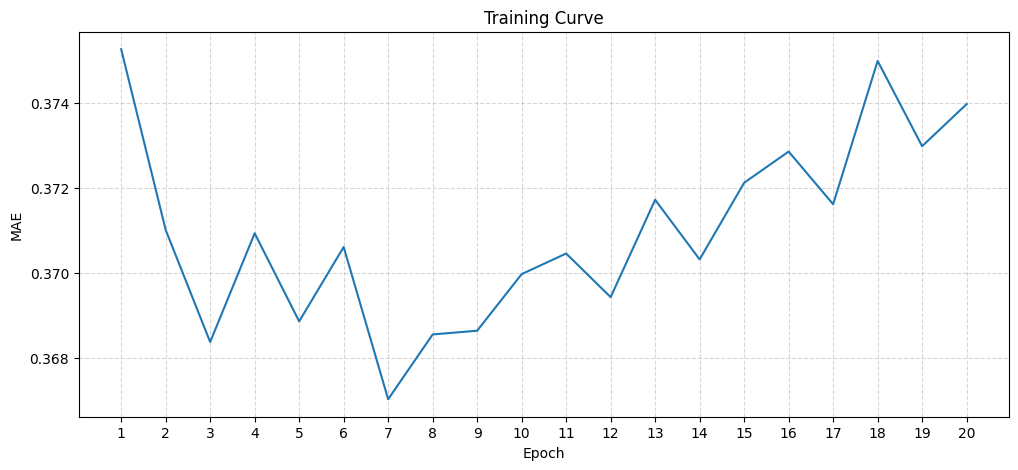

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(
    table_by_epoch["epoch"],
    table_by_epoch["mae"],
)
plt.title("Training Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.xticks(range(1, 21))
plt.grid(True, which="both", ls="--", alpha=0.5)

In [8]:
def _get_best_table_by(col: str):
    best_epoch = table_by_epoch.sort(by=col).slice(0, 1).select("epoch").item()
    print(f"Best {col.upper()}: {table_by_epoch[col].min():.3}")
    best_epoch_table = table.filter(pl.col("epoch") == best_epoch).drop("epoch")
    return best_epoch, best_epoch_table


best_epoch, best_epoch_table = _get_best_table_by("mae")
display(best_epoch_table)

Best MAE: 0.367


photo_id,business_id,business_photo_count,label,business_review_count,prediction,actual,error,abs_error
str,str,u32,str,i64,f64,f64,f64,f64
"""Kvz-jVXg5evIhkGkdKmONA""","""jmwasbZfgj3honf79qKsnA""",15,"""outside""",805,3.937816,4.306943,-0.369127,0.369127
"""gnHNoSNRYPxuJZytcIbPAw""","""jmwasbZfgj3honf79qKsnA""",15,"""food""",805,4.034883,4.306943,-0.272059,0.272059
"""4P4NTHw7UqZGLYPTKm-SKQ""","""jmwasbZfgj3honf79qKsnA""",15,"""inside""",805,4.198645,4.306943,-0.108298,0.108298
"""o2xOmnc4bcRtNWWJ_PCjPQ""","""jmwasbZfgj3honf79qKsnA""",15,"""food""",805,4.13317,4.306943,-0.173773,0.173773
"""BMditKsLEemfYar_bGnu-Q""","""jmwasbZfgj3honf79qKsnA""",15,"""inside""",805,4.104672,4.306943,-0.20227,0.20227
…,…,…,…,…,…,…,…,…
"""tr5QdR1aubUWM7Fc300h1g""","""hVS67L6bYtNZyuvqDX2O6w""",6,"""inside""",53,3.754201,4.12963,-0.375429,0.375429
"""uMVOGwAPzDUZRkVzQEk77A""","""hVS67L6bYtNZyuvqDX2O6w""",6,"""inside""",53,3.926355,4.12963,-0.203275,0.203275
"""K9Qx2JiKoSzPDpfDycFNGA""","""hVS67L6bYtNZyuvqDX2O6w""",6,"""food""",53,3.864482,4.12963,-0.265147,0.265147


In [9]:
best_epoch_table_grouped = best_epoch_table.group_by("business_id").agg(
    abs_error=pl.col("abs_error").mean(),
    actual=pl.col("actual").first(),
)

print("grouped MAE:", best_epoch_table_grouped["abs_error"].mean())

best_epoch_table_grouped

grouped MAE: 0.44377753266810877


business_id,abs_error,actual
str,f64,f64
"""OzoE9NH0xjhfsVMc7ygaaQ""",0.05116,3.896907
"""j5IsoB-xT1Kqp8yQjQnaXA""",0.169187,3.860465
"""xXFSEWRO0012YBbdoJ1kRw""",0.050784,4.017857
"""78Zltl955e25PzcLfA4uNQ""",0.290081,3.521212
"""7Dbd0-5Jq-5vAR4fRqbIzQ""",0.786992,4.742574
…,…,…
"""SAOH3xlPy1sIs6SYuerdww""",0.634235,4.54386
"""TF9Kq-xq7J6Kd3_E0Xl5HQ""",0.622314,3.078571
"""7A1E0o9SHFGiWyY8KUrEeg""",0.393365,4.608696


macro-averaged MAE: 0.67


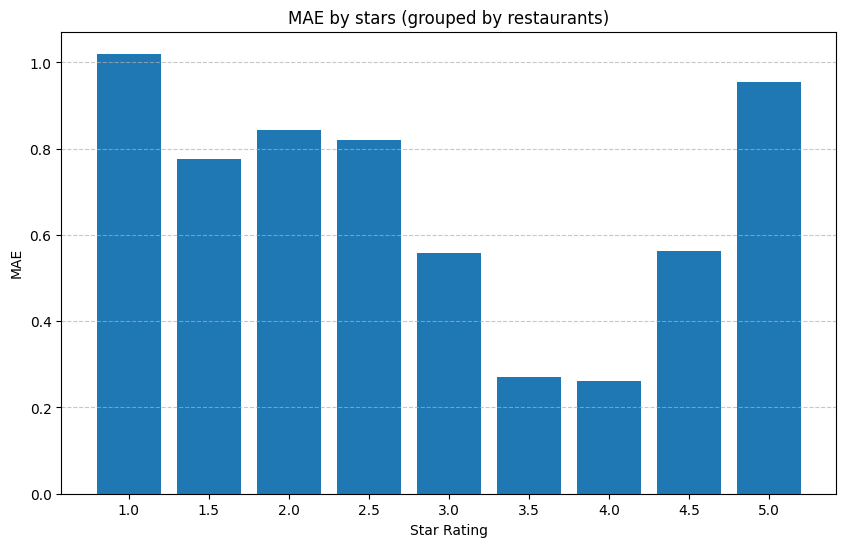

In [10]:
step_size = 0.5
floored_stars_q = (pl.col("actual") / step_size).floor() * step_size
grouped = (
    best_epoch_table_grouped.group_by(floored_stars_q.alias("stars"))
    .agg(
        pl.col("abs_error").mean().alias("mae"),
        pl.col("abs_error").pow(2).mean().alias("mse"),
    )
    .sort("stars")
)

print(f"macro-averaged MAE: {grouped["mae"].mean():.2f}")

plt.figure(figsize=(10, 6))
plt.bar(
    x=grouped["stars"],
    height=grouped["mae"],
    width=0.4,
)
plt.title("MAE by stars (grouped by restaurants)")
plt.xlabel("Star Rating")
plt.ylabel("MAE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks([x/2+1 for x in range(9)]);

macro-averaged MAE: 0.67
macro-averaged MAE: 0.66


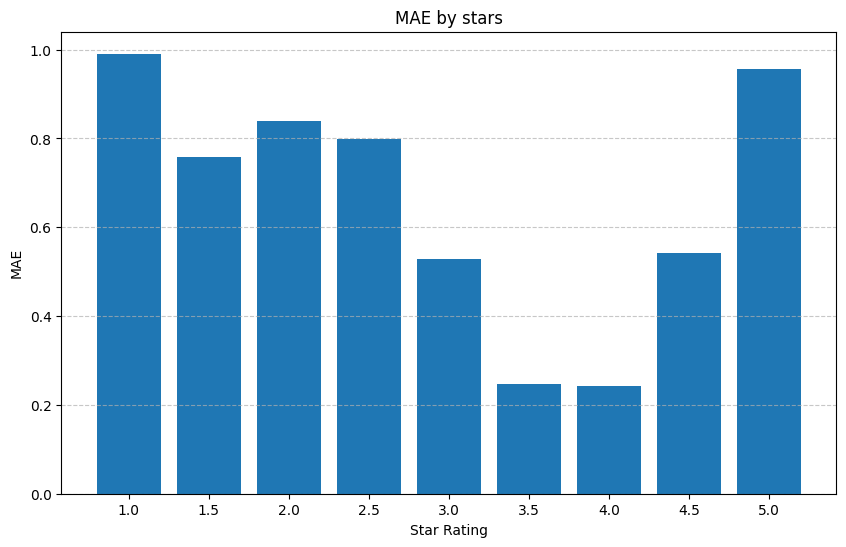

In [11]:
print(f"macro-averaged MAE: {grouped["mae"].mean():.2f}")

step_size = 0.5
floored_stars_q = (pl.col("actual") / step_size).floor() * step_size
grouped = (
    best_epoch_table.group_by(floored_stars_q.alias("stars"))
    .agg(
        pl.col("abs_error").mean().alias("mae"),
        pl.col("error").pow(2).mean().alias("mse"),
    )
    .sort("stars")
)

print(f"macro-averaged MAE: {grouped["mae"].mean():.2f}")

plt.figure(figsize=(10, 6))
plt.bar(
    x=grouped["stars"],
    height=grouped["mae"],
    width=0.4,
)
plt.title("MAE by stars")
plt.xlabel("Star Rating")
plt.ylabel("MAE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks([x/2+1 for x in range(9)]);

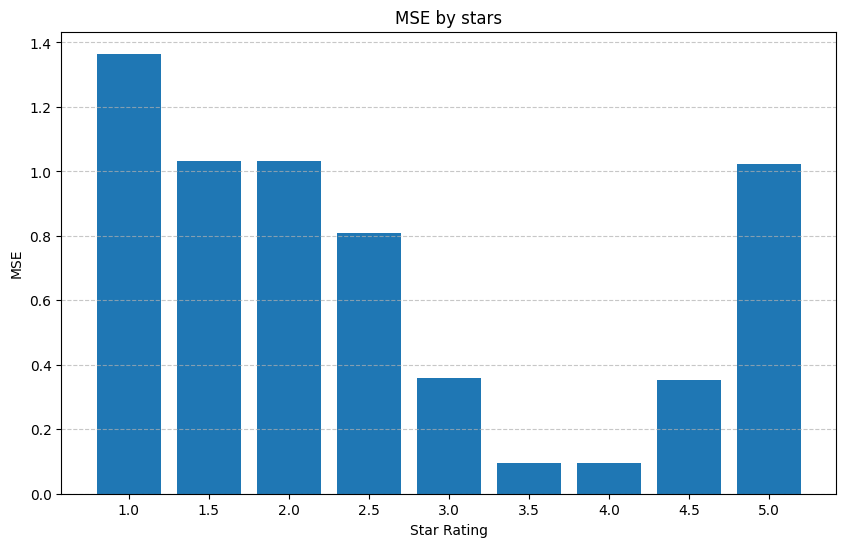

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(
    x=grouped["stars"],
    height=grouped["mse"],
    width=0.4,
)
plt.title("MSE by stars")
plt.xlabel("Star Rating")
plt.ylabel("MSE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks([x/2+1 for x in range(9)]);

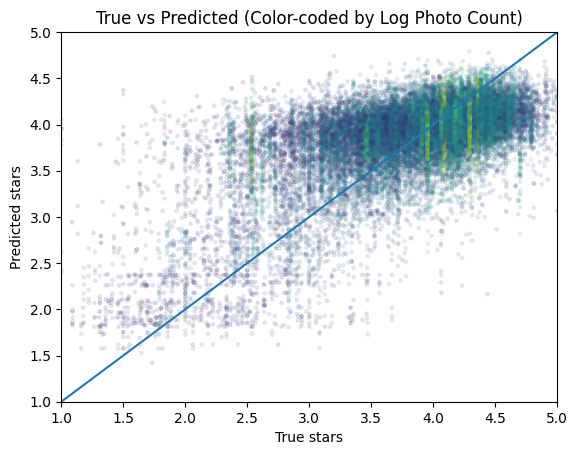

In [13]:
plt.figure()
plt.scatter(
    x=best_epoch_table["actual"],
    y=best_epoch_table["prediction"],
    c=best_epoch_table["business_photo_count"],
    norm=colors.LogNorm(
        vmin=best_epoch_table["business_photo_count"].min(), # type: ignore
        vmax=best_epoch_table["business_photo_count"].max(), # type: ignore
    ),
    cmap='viridis',
    s=6,
    alpha=0.1,
)
plt.plot([1, 5], [1, 5])
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.xlabel("True stars")
plt.ylabel("Predicted stars")
plt.title("True vs Predicted (Color-coded by Log Photo Count)")

None

In [14]:
aggr_by_business = best_epoch_table.group_by("business_id").agg(
    pl.col("abs_error").mean(),
    pl.col("business_photo_count").first(),
    pl.col("business_review_count").first(),
)

aggr_by_business

business_id,abs_error,business_photo_count,business_review_count
str,f64,u32,i64
"""AKAYI-HTy78i4Tr_n8UEYw""",0.094585,2,214
"""To8sBx3uED_CIgtRW3Jrxg""",0.242077,1,52
"""849vV4133tI82lNWCZinOA""",0.033772,1,130
"""MDhbUfzwQFYV3cp1a30YOg""",0.294065,4,41
"""7Iu6QFpZZrICmNQGD2zHuA""",0.22204,4,88
…,…,…,…
"""TCPz-UDU6xjWq2tnDyzNEA""",0.644982,1,26
"""LGOyGWr9PwNHkpI5d72bWg""",0.095507,6,133
"""c8BFvdscjkhieg0C_rx6vg""",0.410295,3,241


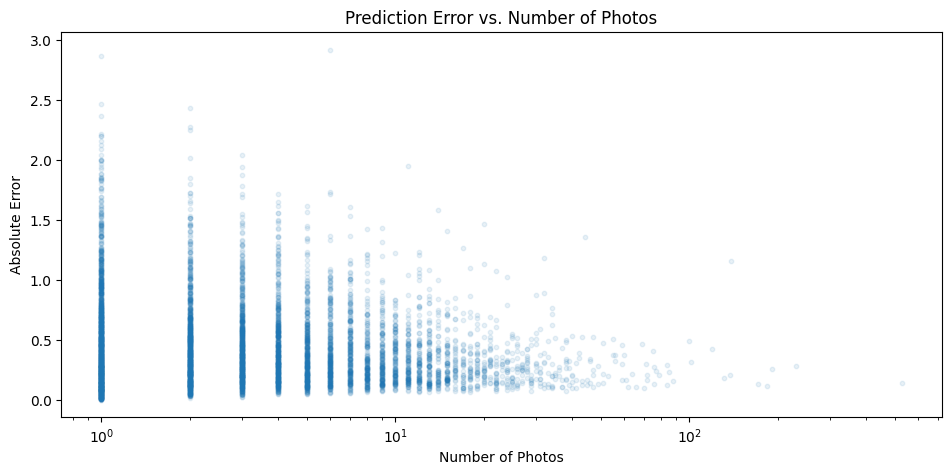

In [15]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=aggr_by_business["business_photo_count"],
    y=aggr_by_business["abs_error"],
    alpha=0.1,
    s=10,
)
plt.title("Prediction Error vs. Number of Photos")
plt.xlabel("Number of Photos")
plt.ylabel("Absolute Error")
plt.xscale("log")

None

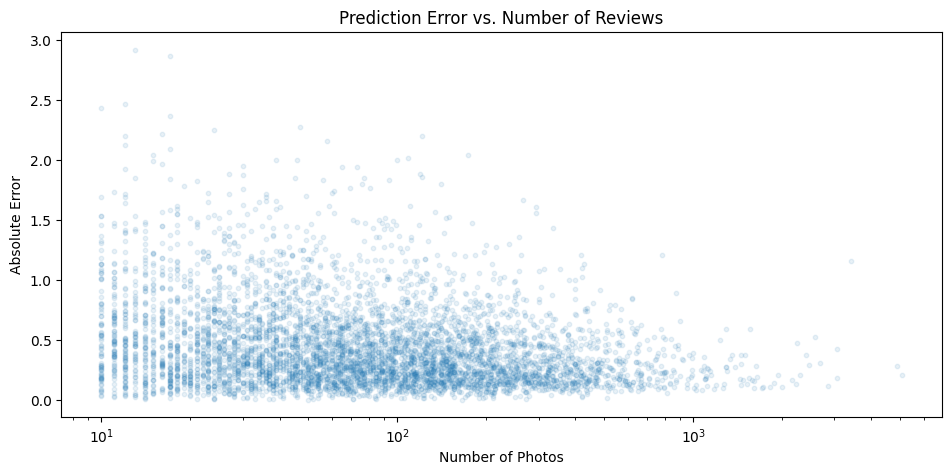

In [16]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=aggr_by_business["business_review_count"],
    y=aggr_by_business["abs_error"],
    alpha=0.1,
    s=10,
)
plt.title("Prediction Error vs. Number of Reviews")
plt.xlabel("Number of Photos")
plt.ylabel("Absolute Error")
plt.xscale("log")
None